In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2. Exploratory Data Analysis


In [5]:
# use filtered data with no outliers
df = pd.read_csv('2014_filtered.csv', index_col=False)
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,5.727000e+09,683400000.0,0.066,0.2041,6.706,634100000.0,0.0173,0.0,18.603845,1,Consumer Defensive
1,4.551600e+09,241900000.0,-0.021,-0.1154,2.211,536500000.0,0.0117,0.0,26.681241,1,Consumer Defensive
2,2.464867e+09,771439000.0,0.196,0.3189,3.020,597491000.0,0.0000,0.0,37.721889,1,Consumer Defensive
3,3.297600e+09,743500000.0,0.126,0.1969,7.779,540300000.0,0.0157,0.0,10.792636,1,Consumer Defensive
4,5.973810e+08,183876000.0,0.122,0.1289,10.909,111582000.0,0.0000,0.0,49.607672,1,Consumer Defensive
...,...,...,...,...,...,...,...,...,...,...,...
1516,1.185080e+08,9650000.0,0.034,0.1324,4.249,7612000.0,0.0000,0.0,-2.453386,0,Technology
1517,4.952987e+07,-53213.0,-0.002,-0.0097,4.505,523987.0,0.0000,0.0,29.362884,1,Technology
1518,1.532400e+08,20887000.0,0.085,0.3646,2.426,-1587000.0,0.0000,11326000.0,-31.167763,0,Technology
1519,3.407580e+08,8512000.0,0.017,0.1456,8.489,5745000.0,0.0395,0.0,7.779579,1,Technology


## 2.1 Group by Sector

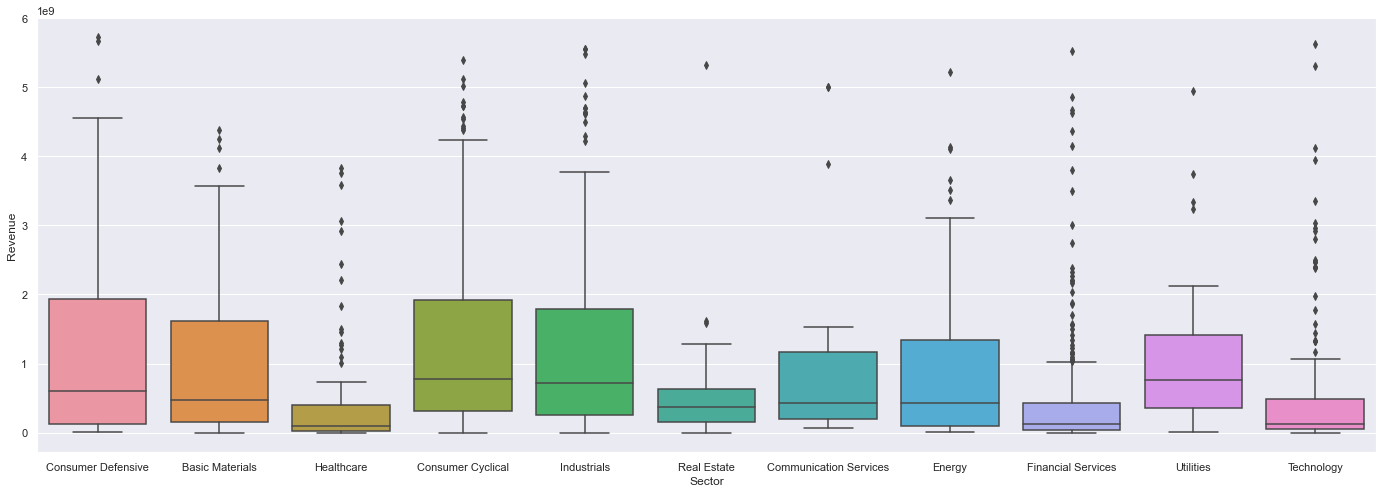

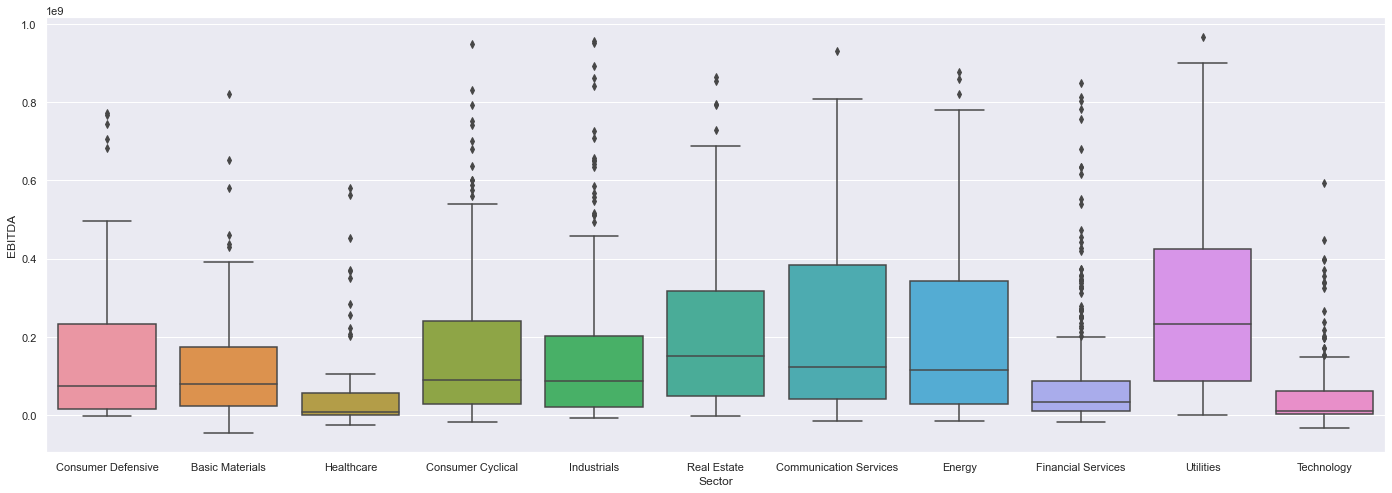

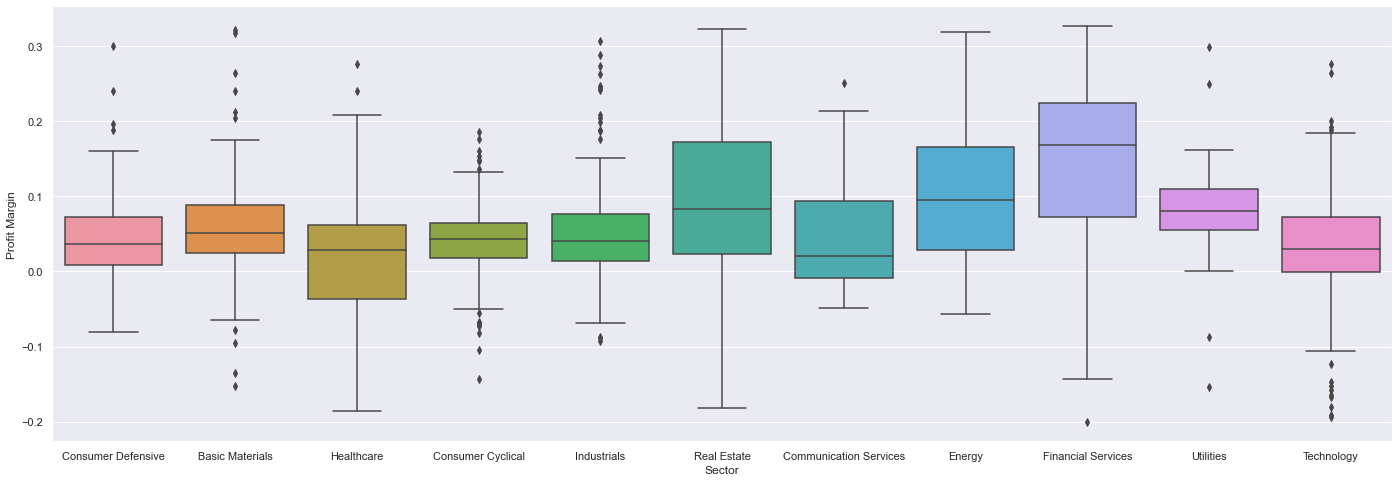

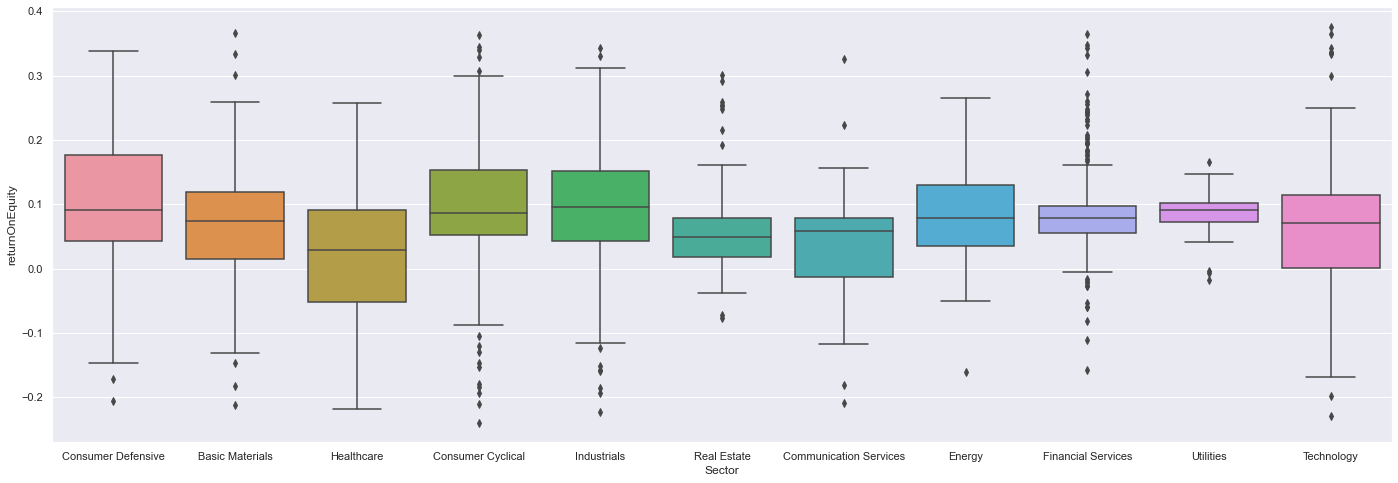

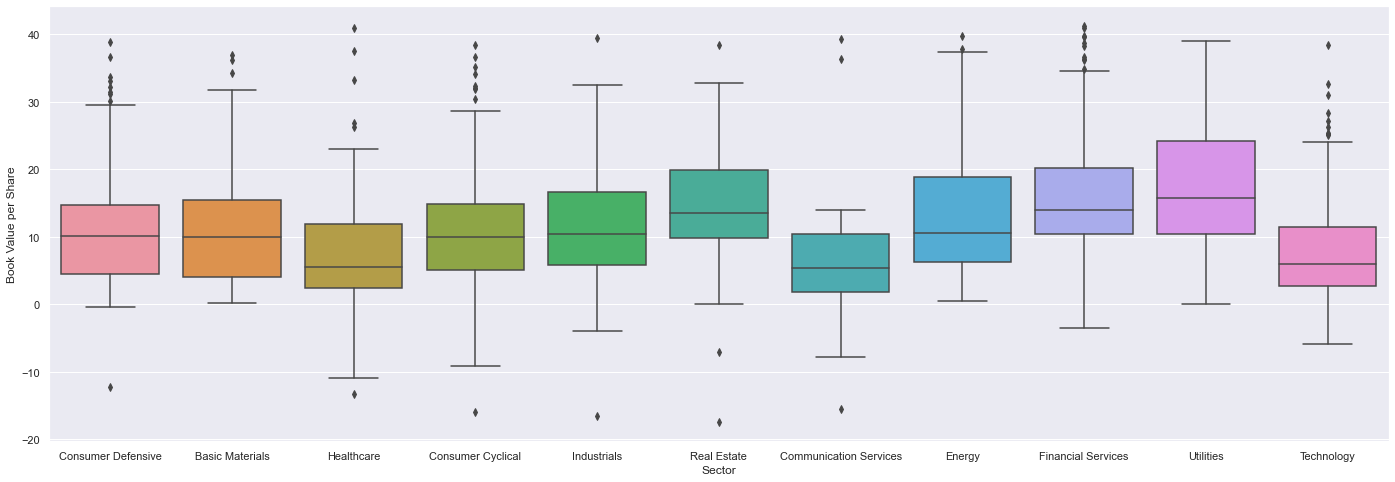

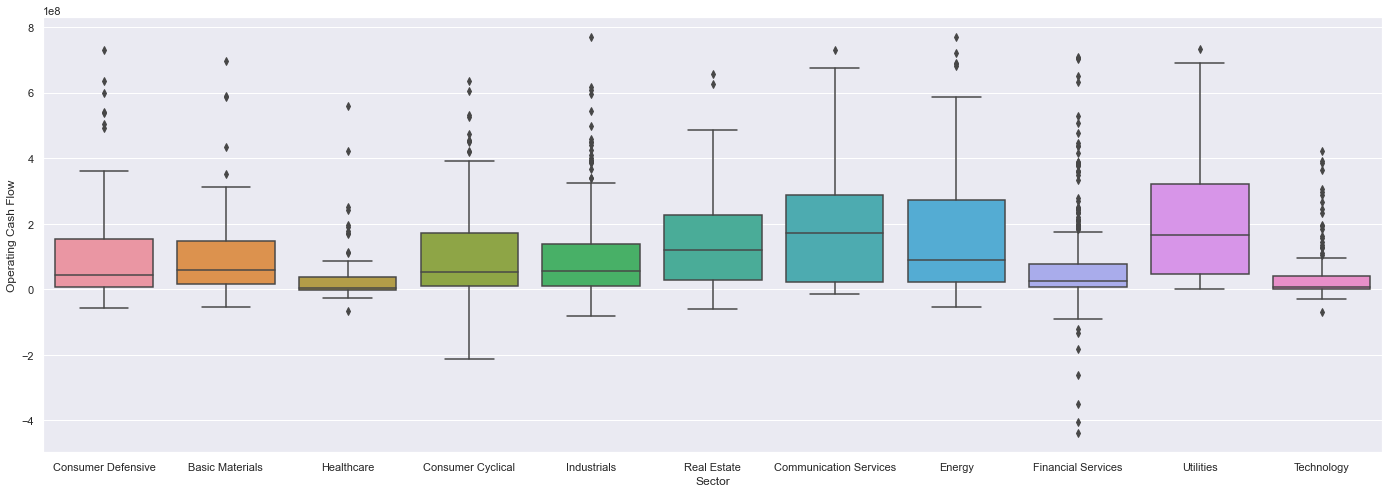

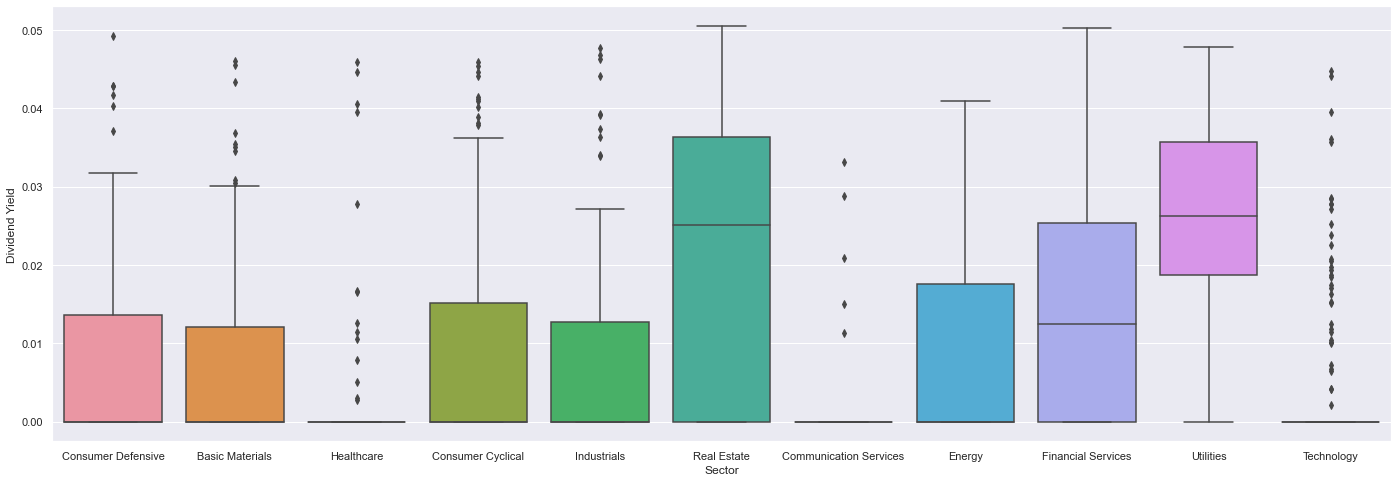

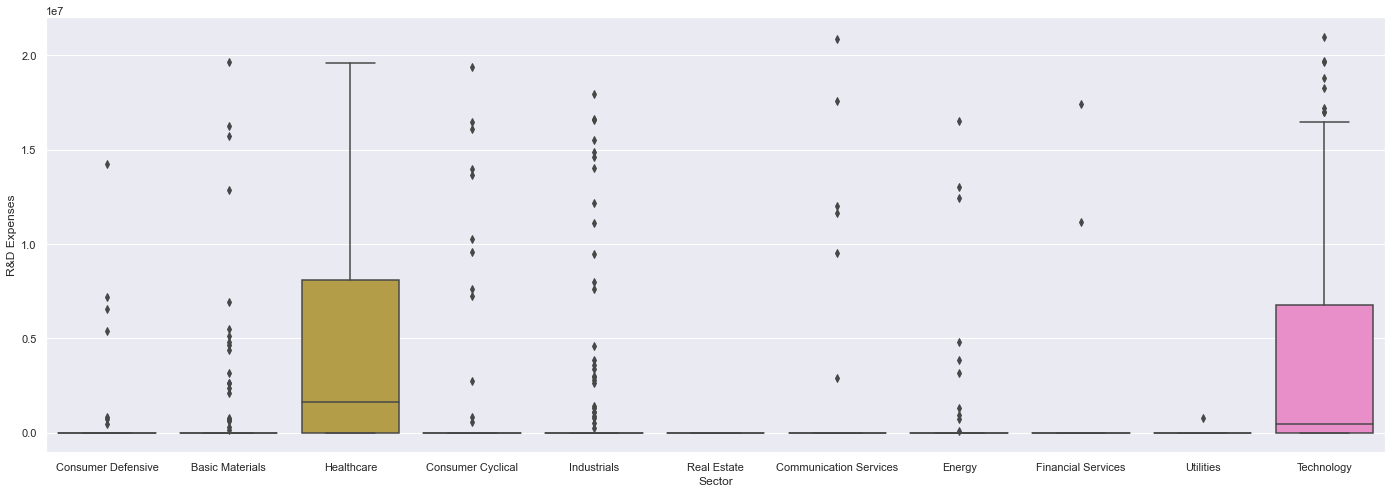

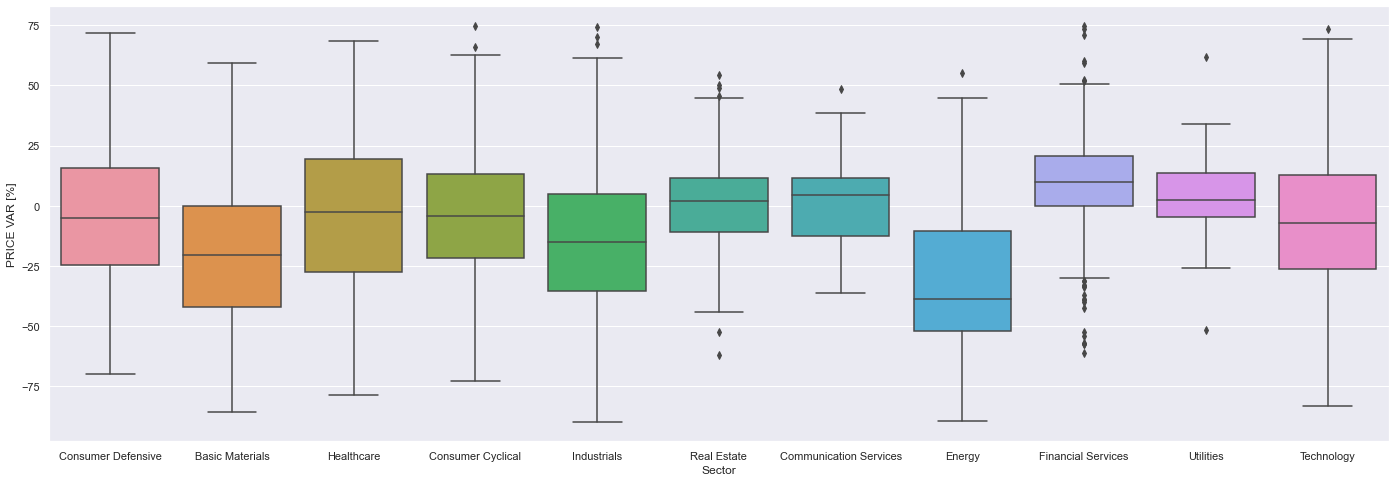

In [6]:
for factor in df.columns[0:-2]:
    f, axes = plt.subplots(1, 1, figsize=(24,8))
    sns.boxplot(x = 'Sector', y = factor, data = df, ax = axes)

In [7]:
# find percentage of stock that has 'buy' rating (Class = 1, PRICE VAR [%] > 0) in each Sector
for sector in df['Sector'].unique():
    buy_count = len(df.loc[(df['Class'] == 1) & (df['Sector'] == sector)])
    total_size = len(df.loc[df['Sector'] == sector])
    print(f'{sector} {round(100 * buy_count / total_size, 2)}%')

Consumer Defensive 45.78%
Basic Materials 24.51%
Healthcare 45.35%
Consumer Cyclical 40.35%
Industrials 30.19%
Real Estate 52.88%
Communication Services 60.0%
Energy 16.67%
Financial Services 75.0%
Utilities 58.97%
Technology 38.26%


## 2.2 Correlation Matrix

<AxesSubplot:>

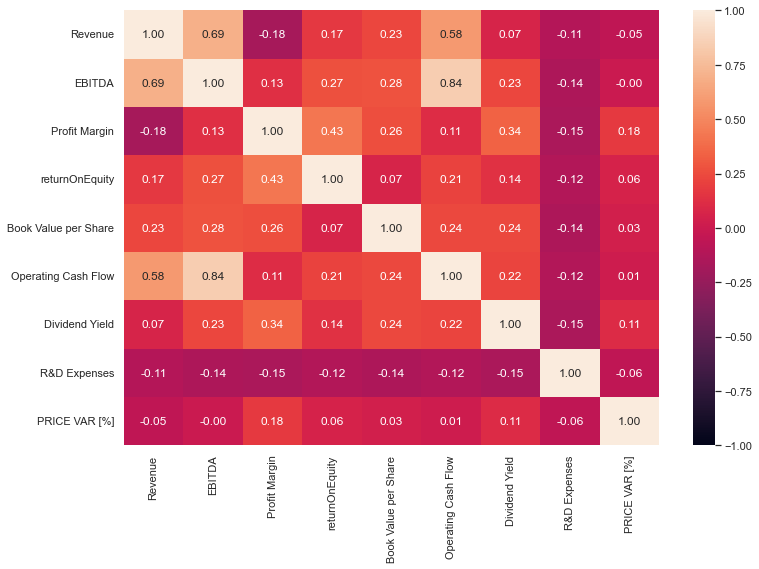

In [8]:
f, axes = plt.subplots(1, 1, figsize=(12,8))
sns.heatmap(df.iloc[:, :-2].corr(), vmin = -1, vmax = +1, annot=True, fmt='.2f')

There is no strong correlation between one specific indicator with PRICE VAR [%].
So we will use ML models to only predict Buy/Sell (Class = 1/0) from these indicators.